In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

### Autorzy: <ul> <li>Halszka Kościelska</li><li>Jakub Markil</li><li>Sandra Mleczak</li>

In [2]:
file = "LOL.csv"

dane = pd.read_csv(file)

kolumny = list(dane.columns)

indexes = list(dane.index)

length = range(len(indexes))

In [3]:
dane["Primary_Location"] = dane["Primary_Location"].str.replace('bottom', 'Bottom')

prim_loc = dane["Primary_Location"]
prim_role = dane["Primary_Role"]
attck = dane["Attack_Damage"]
move_spd = dane["Movement_Speed"]
rang = dane["Range"]

variables = [prim_loc, prim_role, attck, move_spd, rang]
prim_loc.unique()

array(['Top', 'Mid', 'Support', 'Jungle', 'Bottom'], dtype=object)

In [39]:
descr = [var.describe() for var in variables]
descr_DF = [pd.DataFrame(desc) for desc in descr]

for x in descr_DF: print(x, '\n')

       Primary_Location
count               161
unique                5
top                 Top
freq                 40 

       Primary_Role
count           161
unique            6
top         Fighter
freq             43 

       Attack_Damage
count     161.000000
mean       59.068323
std         5.833228
min        40.000000
25%        55.000000
50%        60.000000
75%        63.000000
max        72.000000 

       Movement_Speed
count      161.000000
mean       335.795031
std          8.205271
min        285.000000
25%        330.000000
50%        335.000000
75%        340.000000
max        355.000000 

            Range
count  161.000000
mean   329.378882
std    192.592314
min    125.000000
25%    125.000000
50%    200.000000
75%    525.000000
max    650.000000 



Wybrane dane:
<ul>
    <li> primary_role </li>
    <li> primary_location </li>
    <li> attack_damage </li>
    <li> movement_speed </li>
    <li> range </li>
</ul>
Robimy korelacje typu:
<ul>
    <li> primary_role - primary_location </li>
    <li> attack_damage - movement_speed </li>
    <li> attack_damage - range </li>
</ul>

In [5]:
rval_rangatt, pval_rangatt = st.pearsonr(attck, rang)
print(rval_rangatt)
print(pval_rangatt)

-0.644330634172071
2.9312944832799394e-20


In [22]:
rval_movatt, pval_movatt = st.pearsonr(attck, move_spd)
print(rval_movatt)
print(pval_movatt)

0.41632367135140225
3.955389185734442e-08


In [6]:
role_count = prim_role.value_counts()

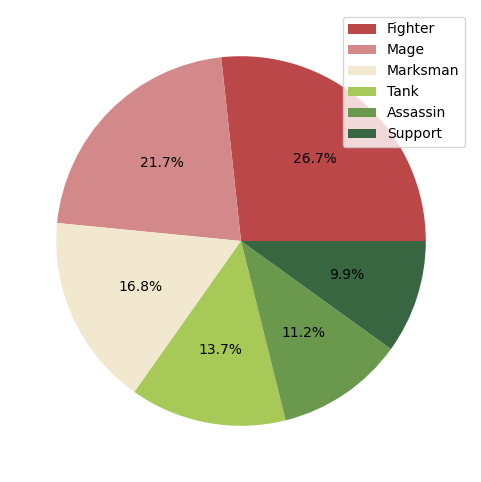

In [7]:
kolorki = ["#BC4749", "#D38889", "#F2E8CF", '#A7C957', '#6A994E', '#386641']
plt.figure(1, figsize = (6,6))
plt.pie(role_count, autopct='%1.1f%%', colors=kolorki)
plt.legend(labels = role_count.index)
# plt.title('Główne role')
# plt.savefig("roles.png")
plt.show()

In [8]:
loc_count = dane.groupby('Primary_Location')['Primary_Location'].count()

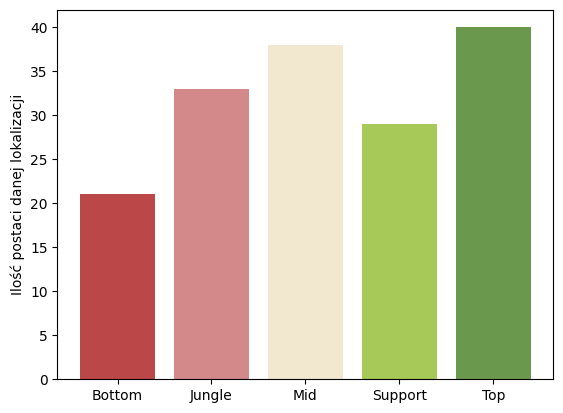

In [9]:
plt.bar(loc_count.index, loc_count, color=kolorki)
plt.ylabel('Ilość postaci danej lokalizacji')
# plt.title('Główne lokacje')
# plt.savefig("locations.png")
plt.show()

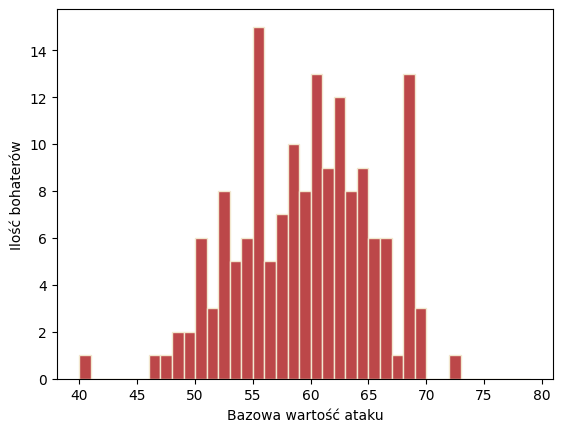

In [32]:
plt.hist(attck, bins=range(40,80), color=kolorki[0], edgecolor=kolorki[2])
plt.xlabel("Bazowa wartość ataku")
plt.ylabel("Ilość bohaterów")
# plt.title('Rozkład zmiennej "Attack Damage"')
# plt.savefig('attck_histo.png')
plt.show()

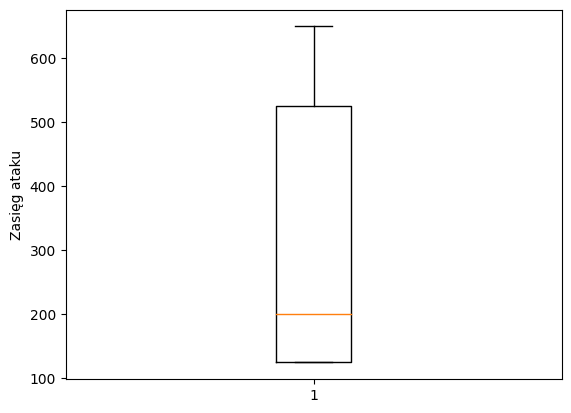

In [11]:
plt.boxplot(rang)
plt.ylabel("Zasięg ataku")
# plt.savefig("boxplot.png")
plt.show()

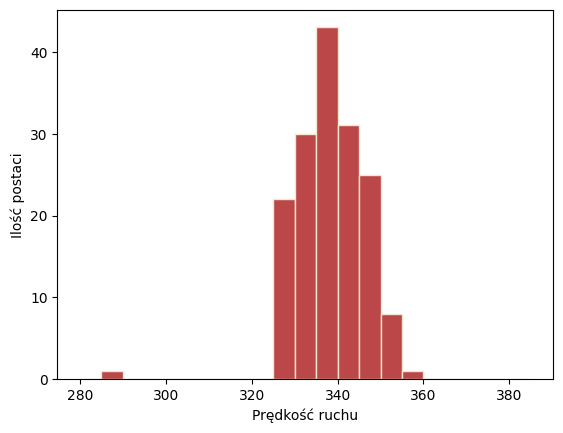

In [37]:
plt.hist(move_spd, bins=range(280,390,5), color=kolorki[0], edgecolor=kolorki[2])
plt.xlabel("Prędkość ruchu")
plt.ylabel("Ilość postaci")
# plt.savefig("movespd_hist.png")
plt.show()

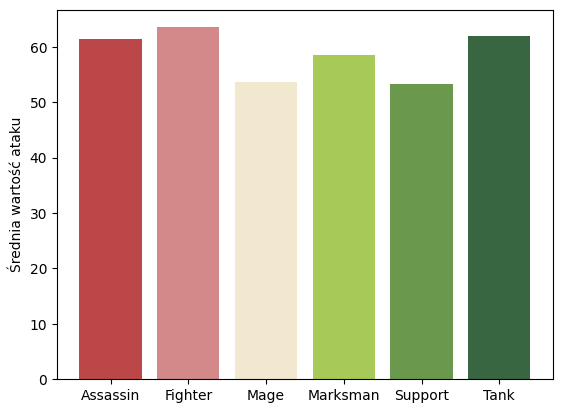

In [12]:
temp = dane.groupby('Primary_Role')['Attack_Damage'].mean()
attack_role = temp.reset_index()
plt.bar(attack_role.Primary_Role, attack_role.Attack_Damage, color=kolorki)
plt.ylabel("Średnia wartość ataku")
# plt.savefig("attck_mean.png")
plt.show()

Tutaj zrobimy test T dla dwóch średnich z powyższego zestawienia. Dokładniej sprawdzimy czy różnica między najwyższą i najniższą średnią jest istotna statystycznie.

In [27]:
x = [] # lista wartości ataku postaci supportowych (najniższa średnia ataku)
y = [] # lista wartości ataku postaci Fighter (najwyższa średnia ataku)
for i in range(len(dane)):
    if dane["Primary_Role"][i] == "Support":
        x.append(dane["Attack_Damage"][i])
    if dane["Primary_Role"][i] == "Fighter":
        y.append(dane["Attack_Damage"][i])

st.ttest_ind(y, x)

Ttest_indResult(statistic=8.018973269416986, pvalue=6.391631033352164e-11)

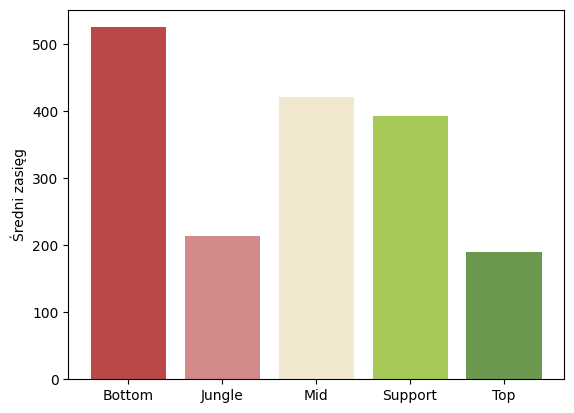

In [14]:
temp = dane.groupby('Primary_Location')['Range'].mean()
range_loc = temp.reset_index()
plt.bar(range_loc.Primary_Location, range_loc.Range, color=kolorki)
plt.ylabel("Średni zasięg")
# plt.savefig("range_loc.png")
plt.show()

Tutaj podobnie jak wyżej, tylko że innych zmiennych.

In [28]:
x = [] # lista wartości ataku postaci Top (najniższy średni zasięg)
y = [] # lista wartości ataku postaci Bottom (najwyższy średni zasięg)
for i in range(len(dane)):
    if dane["Primary_Location"][i] == "Top":
        x.append(dane["Range"][i])
    if dane["Primary_Location"][i] == "Bottom":
        y.append(dane["Range"][i])
        
st.ttest_ind(y, x)

Ttest_indResult(statistic=12.18782264320009, pvalue=9.331714141963301e-18)